In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, SVR
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score)

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X_cls, y_cls = iris.data, iris.target  # Features and target

In [3]:
# Split into training and test sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

In [4]:
# SVM Classification Without Scaling 
svm_cls_no_scaling = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_cls_no_scaling.fit(X_train_cls, y_train_cls)
y_pred_cls_no_scaling = svm_cls_no_scaling.predict(X_test_cls)
acc_no_scaling = accuracy_score(y_test_cls, y_pred_cls_no_scaling)

In [5]:
# SVM Classification With Scaling 
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)
svm_cls_scaled = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_cls_scaled.fit(X_train_cls_scaled, y_train_cls)

SVC()

In [12]:
y_pred_cls_scaled = svm_cls_scaled.predict(X_test_cls_scaled)
acc_scaled = accuracy_score(y_test_cls, y_pred_cls_scaled)

print("SVM Classification Results (Iris Dataset):")
print(f"   - Accuracy WITHOUT Scaling: {acc_no_scaling:.2f}")
print(f"   - Accuracy WITH Scaling: {acc_scaled:.2f}")

SVM Classification Results (Iris Dataset):
   - Accuracy WITHOUT Scaling: 1.00
   - Accuracy WITH Scaling: 1.00


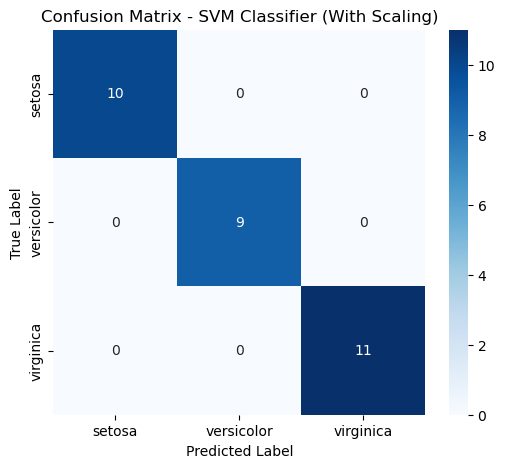

In [7]:
# Confusion Matrix for Scaled Model
cm = confusion_matrix(y_test_cls, y_pred_cls_scaled)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM Classifier (With Scaling)")
plt.show()

In [10]:
# Classification Report (Precision, Recall, F1-score)
print("Classification Report (With Scaling):\n", classification_report(y_test_cls, y_pred_cls_scaled, target_names=iris.target_names))

Classification Report (With Scaling):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

